### Limpieza de NBA_PLAYER_DATASET

In [1]:
# 1. Importar librerías
import pandas as pd
import numpy as np

# 2. Leer el CSV desde la carpeta data_raw (ruta relativa)
df = pd.read_csv("../data_raw/NBA_PLAYER_DATASET.csv")

# 3. Vista inicial
print("Shape:", df.shape)       # Cantidad de filas y columnas

print("\nInfo general:")
df.info()                       # Tipos de datos y nulos

print("\nPrimeras filas:")
display(df.head())              # Primeras filas del dataset



Shape: (29916, 27)

Info general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29916 entries, 0 to 29915
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PLAYER_ID          29916 non-null  int64  
 1   Name               29916 non-null  object 
 2   SEASON_ID          29916 non-null  object 
 3   TEAM_ID            29916 non-null  int64  
 4   TEAM_ABBREVIATION  29908 non-null  object 
 5   PLAYER_AGE         29916 non-null  float64
 6   GP                 29916 non-null  int64  
 7   GS                 23434 non-null  float64
 8   MIN                29147 non-null  float64
 9   FGM                29916 non-null  int64  
 10  FGA                29916 non-null  int64  
 11  FG_PCT             29902 non-null  float64
 12  FG3M               23883 non-null  float64
 13  FG3A               23883 non-null  float64
 14  FG3_PCT            23661 non-null  float64
 15  FTM                29916 non-null  i

,PLAYER_ID,Name,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,76001,Alaa Abdelnaby,1990-91,1610612757,POR,23.0,43,0.0,290.0,55,...,0.568,27.0,62.0,89.0,12,4.0,12.0,22.0,39,135
1,76001,Alaa Abdelnaby,1991-92,1610612757,POR,24.0,71,1.0,934.0,178,...,0.752,81.0,179.0,260.0,30,25.0,16.0,66.0,132,432
2,76001,Alaa Abdelnaby,1992-93,1610612749,MIL,25.0,12,0.0,159.0,26,...,0.750,12.0,25.0,37.0,10,6.0,4.0,13.0,24,64
3,76001,Alaa Abdelnaby,1992-93,1610612738,BOS,25.0,63,52.0,1152.0,219,...,0.760,114.0,186.0,300.0,17,19.0,22.0,84.0,165,514
4,76001,Alaa Abdelnaby,1992-93,0,TOT,25.0,75,52.0,1311.0,245,...,0.759,126.0,211.0,337.0,27,25.0,26.0,97.0,189,578


In [2]:
# Conteo de valores nulos por columna
nulls = df.isnull().sum().sort_values(ascending=False)

print("Nulos por columna:")
print(nulls)



Nulos por columna:
GS                   6482
FG3_PCT              6255
FG3M                 6033
FG3A                 6033
TOV                  5315
BLK                  4163
STL                  4163
OREB                 4163
DREB                 4163
MIN                   769
REB                   657
FT_PCT                119
FG_PCT                 14
TEAM_ABBREVIATION       8
GP                      0
TEAM_ID                 0
PLAYER_ID               0
Name                    0
SEASON_ID               0
FGA                     0
FGM                     0
PLAYER_AGE              0
FTA                     0
FTM                     0
AST                     0
PF                      0
PTS                     0
dtype: int64


## Limpieza de Nulos en NBA_PLAYER_DATASET
Estrategia aplicada sobre df

GS, FG3M, FG3A, FG3_PCT, STL, BLK, OREB, DREB, TOV
→ reemplazar NaN por 0.

TEAM_ABBREVIATION
→ reemplazar NaN por "TOT".

MIN, REB, FT_PCT, FG_PCT
→ reemplazar NaN por 0.

In [3]:
# Columnas donde los NaN significan "0"
cols_fill_zero = ["GS", "FG3M", "FG3A", "FG3_PCT",
                  "STL", "BLK", "OREB", "DREB", "TOV"]
df[cols_fill_zero] = df[cols_fill_zero].fillna(0)

# TEAM_ABBREVIATION: reemplazar nulos por "TOT"
df["TEAM_ABBREVIATION"] = df["TEAM_ABBREVIATION"].fillna("TOT")

# Otros nulos menores -> reemplazar por 0
cols_minor = ["MIN", "REB", "FT_PCT", "FG_PCT"]
df[cols_minor] = df[cols_minor].fillna(0)

# Verificación post-limpieza
print("Nulos restantes por columna:")
print(df.isnull().sum().sort_values(ascending=False).head(10))

print("\nInfo general después de limpieza:")
df.info()


Nulos restantes por columna:
PLAYER_ID            0
Name                 0
SEASON_ID            0
TEAM_ID              0
TEAM_ABBREVIATION    0
PLAYER_AGE           0
GP                   0
GS                   0
MIN                  0
FGM                  0
dtype: int64

Info general después de limpieza:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29916 entries, 0 to 29915
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PLAYER_ID          29916 non-null  int64  
 1   Name               29916 non-null  object 
 2   SEASON_ID          29916 non-null  object 
 3   TEAM_ID            29916 non-null  int64  
 4   TEAM_ABBREVIATION  29916 non-null  object 
 5   PLAYER_AGE         29916 non-null  float64
 6   GP                 29916 non-null  int64  
 7   GS                 29916 non-null  float64
 8   MIN                29916 non-null  float64
 9   FGM                29916 non-null  int64  
 10  FGA

In [4]:
# Resumen estadístico de las columnas numéricas
desc = df.describe().T

print("Resumen estadístico:")
print(desc)



Resumen estadístico:
              count          mean           std   min           25%  \
PLAYER_ID   29916.0  2.453447e+05  4.929927e+05   2.0  1.882000e+03   
TEAM_ID     29916.0  1.472142e+09  4.515037e+08   0.0  1.610613e+09   
PLAYER_AGE  29916.0  2.699168e+01  3.943063e+00  15.0  2.400000e+01   
GP          29916.0  4.898279e+01  2.650610e+01   1.0  2.500000e+01   
GS          29916.0  1.775729e+01  2.648294e+01   0.0  0.000000e+00   
MIN         29916.0  1.122110e+03  9.315415e+02   0.0  2.590000e+02   
FGM         29916.0  1.873297e+02  1.838693e+02   0.0  3.700000e+01   
FGA         29916.0  4.136588e+02  3.892340e+02   0.0  9.100000e+01   
FG_PCT      29916.0  4.285800e-01  1.060638e-01   0.0  3.900000e-01   
FG3M        29916.0  2.153857e+01  4.034922e+01   0.0  0.000000e+00   
FG3A        29916.0  6.107230e+01  1.075985e+02   0.0  0.000000e+00   
FG3_PCT     29916.0  1.769300e-01  1.869165e-01   0.0  0.000000e+00   
FTM         29916.0  9.583878e+01  1.098835e+02   0.0  1

## Observaciones

Minutos y puntos: la mayoría de los jugadores promedian entre 900–1800 minutos y 300–750 puntos por temporada.

Triples: muchos registros con 0, consistente con temporadas antiguas donde no se lanzaban triples.

Porcentajes: centrados en rangos realistas (FG ≈ 43%, FT ≈ 69%).

Valores máximos: algunos outliers esperables (jugadores superestrellas con más de 4000 puntos en una temporada).

In [5]:
# Columnas que deberían ser enteras
cols_to_int = ["PLAYER_AGE", "GS", "MIN", 
               "FG3M", "FG3A", 
               "OREB", "DREB", "REB", 
               "STL", "BLK", "TOV"]

# Convertimos a entero (con fillna por seguridad, aunque ya limpiamos nulos)
df[cols_to_int] = df[cols_to_int].fillna(0).astype(int)

# Verificación
print(df.dtypes)



PLAYER_ID              int64
Name                  object
SEASON_ID             object
TEAM_ID                int64
TEAM_ABBREVIATION     object
PLAYER_AGE             int64
GP                     int64
GS                     int64
MIN                    int64
FGM                    int64
FGA                    int64
FG_PCT               float64
FG3M                   int64
FG3A                   int64
FG3_PCT              float64
FTM                    int64
FTA                    int64
FT_PCT               float64
OREB                   int64
DREB                   int64
REB                    int64
AST                    int64
STL                    int64
BLK                    int64
TOV                    int64
PF                     int64
PTS                    int64
dtype: object


In [6]:
# Crear columna con nombres limpios
df["Name_clean"] = df["Name"].str.strip()       # quitar espacios extra
df["Name_clean"] = df["Name_clean"].str.replace("-", " ", regex=False)  # guiones -> espacio
df["Name_clean"] = df["Name_clean"].str.title() # formato título

# Verificar cambios
print("Ejemplos de nombres originales vs limpios:")
print(df[["Name", "Name_clean"]].head(20))


Ejemplos de nombres originales vs limpios:
               Name       Name_clean
0    Alaa Abdelnaby   Alaa Abdelnaby
1    Alaa Abdelnaby   Alaa Abdelnaby
2    Alaa Abdelnaby   Alaa Abdelnaby
3    Alaa Abdelnaby   Alaa Abdelnaby
4    Alaa Abdelnaby   Alaa Abdelnaby
5    Alaa Abdelnaby   Alaa Abdelnaby
6    Alaa Abdelnaby   Alaa Abdelnaby
7    Alaa Abdelnaby   Alaa Abdelnaby
8    Alaa Abdelnaby   Alaa Abdelnaby
9   Zaid Abdul-Aziz  Zaid Abdul Aziz
10  Zaid Abdul-Aziz  Zaid Abdul Aziz
11  Zaid Abdul-Aziz  Zaid Abdul Aziz
12  Zaid Abdul-Aziz  Zaid Abdul Aziz
13  Zaid Abdul-Aziz  Zaid Abdul Aziz
14  Zaid Abdul-Aziz  Zaid Abdul Aziz
15  Zaid Abdul-Aziz  Zaid Abdul Aziz
16  Zaid Abdul-Aziz  Zaid Abdul Aziz
17  Zaid Abdul-Aziz  Zaid Abdul Aziz
18  Zaid Abdul-Aziz  Zaid Abdul Aziz
19  Zaid Abdul-Aziz  Zaid Abdul Aziz


In [7]:
# Verificar cantidad de jugadores únicos
print("Total registros:", len(df))
print("Nombres únicos:", df["Name"].nunique())

# Revisar ejemplos de nombres
print("\nEjemplos de nombres:")
print(df["Name"].unique()[:20])

# Chequear si hay espacios extra
df["Name_strip"] = df["Name"].str.strip()
espacios = df[df["Name"] != df["Name_strip"]]
print("\nNombres con espacios extra:", espacios["Name"].unique())

# Corroborar nombres con guiones
guiones = df[df["Name"].str.contains("-", na=False)]
print("\nCantidad de nombres con guiones:", guiones["Name"].nunique())
print("\nEjemplos de nombres con guiones:")
print(guiones["Name"].unique()[:20])



Total registros: 29916
Nombres únicos: 4857

Ejemplos de nombres:
['Alaa Abdelnaby' 'Zaid Abdul-Aziz' 'Kareem Abdul-Jabbar'
 'Mahmoud Abdul-Rauf' 'Tariq Abdul-Wahad' 'Shareef Abdur-Rahim'
 'Tom Abernethy' 'Forest Able' 'John Abramovic' 'Alex Abrines'
 'Precious Achiuwa' 'Alex Acker' 'Donald Ackerman' 'Mark Acres'
 'Charles Acton' 'Quincy Acy' 'Alvan Adams' 'Don Adams' 'Hassan Adams'
 'Jaylen Adams']

Nombres con espacios extra: []

Cantidad de nombres con guiones: 40

Ejemplos de nombres con guiones:
['Zaid Abdul-Aziz' 'Kareem Abdul-Jabbar' 'Mahmoud Abdul-Rauf'
 'Tariq Abdul-Wahad' 'Shareef Abdur-Rahim' 'DeVaughn Akoon-Purcell'
 'Ty-Shon Alexander' 'Nickeil Alexander-Walker' 'Al-Farouq Aminu'
 'Keita Bates-Diop' 'Ruben Boumtje-Boumtje' 'Kentavious Caldwell-Pope'
 'Michael Carter-Williams' 'Willie Cauley-Stein' 'Bryce Dejean-Jones'
 'Chris Douglas-Roberts' 'Khalid El-Amin' 'Dorian Finney-Smith'
 'Javon Freeman-Liberty' 'Marcus Georges-Hunt']


In [8]:
# Crear columna con nombres limpios sin guiones
df["Name_clean"] = (
    df["Name"]
    .str.replace("-", " ", regex=False)  # quitar guiones
    .str.strip()                         # quitar espacios extra
    .str.title()                         # formato título
)

# Verificar algunos cambios
print(df[["Name", "Name_clean"]].head(20))

# Contar nombres únicos antes y después
print("\nNombres únicos originales:", df["Name"].nunique())
print("Nombres únicos limpios:", df["Name_clean"].nunique())



               Name       Name_clean
0    Alaa Abdelnaby   Alaa Abdelnaby
1    Alaa Abdelnaby   Alaa Abdelnaby
2    Alaa Abdelnaby   Alaa Abdelnaby
3    Alaa Abdelnaby   Alaa Abdelnaby
4    Alaa Abdelnaby   Alaa Abdelnaby
5    Alaa Abdelnaby   Alaa Abdelnaby
6    Alaa Abdelnaby   Alaa Abdelnaby
7    Alaa Abdelnaby   Alaa Abdelnaby
8    Alaa Abdelnaby   Alaa Abdelnaby
9   Zaid Abdul-Aziz  Zaid Abdul Aziz
10  Zaid Abdul-Aziz  Zaid Abdul Aziz
11  Zaid Abdul-Aziz  Zaid Abdul Aziz
12  Zaid Abdul-Aziz  Zaid Abdul Aziz
13  Zaid Abdul-Aziz  Zaid Abdul Aziz
14  Zaid Abdul-Aziz  Zaid Abdul Aziz
15  Zaid Abdul-Aziz  Zaid Abdul Aziz
16  Zaid Abdul-Aziz  Zaid Abdul Aziz
17  Zaid Abdul-Aziz  Zaid Abdul Aziz
18  Zaid Abdul-Aziz  Zaid Abdul Aziz
19  Zaid Abdul-Aziz  Zaid Abdul Aziz

Nombres únicos originales: 4857
Nombres únicos limpios: 4857


In [9]:
# Revisar posibles duplicados exactos
duplicados = df[df.duplicated(subset=["PLAYER_ID", "SEASON_ID", "TEAM_ABBREVIATION"], keep=False)]
print("Duplicados exactos encontrados:", len(duplicados))

# Ver cuántos jugadores tienen más de un registro en la misma temporada
multi_registros = df.groupby(["PLAYER_ID", "SEASON_ID"]).size()
multi_registros = multi_registros[multi_registros > 1]
print("\nJugadores con más de un registro en la misma temporada:", len(multi_registros))
print(multi_registros.head(20))



Duplicados exactos encontrados: 16

Jugadores con más de un registro en la misma temporada: 2572
PLAYER_ID  SEASON_ID
3          1994-95      3
7          1982-83      3
           1993-94      3
9          1986-87      3
           1987-88      3
17         1994-95      3
21         2001-02      3
26         1993-94      3
31         1992-93      4
           1993-94      4
32         1996-97      3
36         1996-97      3
37         1995-96      3
38         1988-89      3
           1989-90      3
           1995-96      3
42         1995-96      3
43         2002-03      3
45         1996-97      3
46         1995-96      3
dtype: int64


## Exploración de Datos de Jugadores NBA

## Perfil de jugadores (edad)

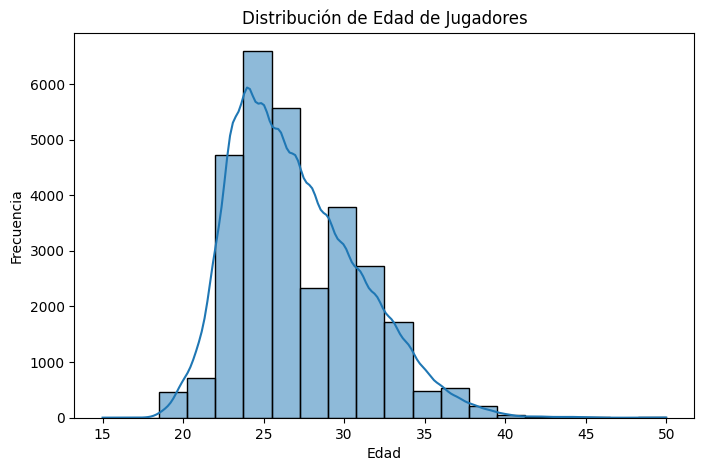

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de edades
plt.figure(figsize=(8,5))
sns.histplot(df["PLAYER_AGE"], bins=20, kde=True)
plt.title("Distribución de Edad de Jugadores")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()


Pico en 24–26 años → etapa de máximo rendimiento.

Mayoría entre 22 y 32 años.

Pocos jugadores superan los 35 años.

La curva muestra que la NBA es una liga de jóvenes en plenitud física, con veteranos como excepciones.

## Evolución histórica (puntos)

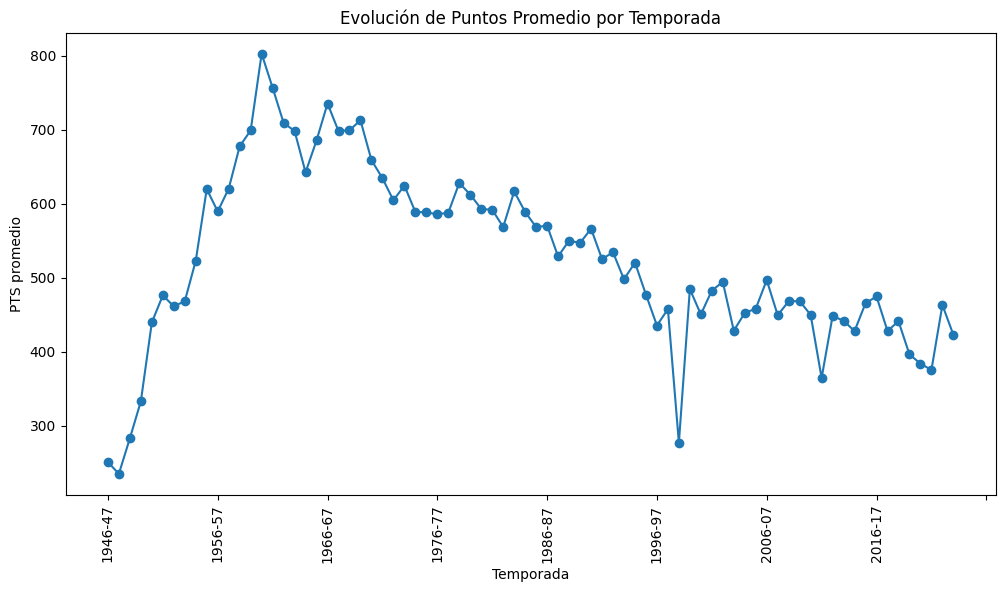

In [11]:
# Agrupar por temporada y calcular promedio de puntos
pts_season = df.groupby("SEASON_ID")["PTS"].mean()

plt.figure(figsize=(12,6))
pts_season.plot(marker="o")
plt.title("Evolución de Puntos Promedio por Temporada")
plt.xlabel("Temporada")
plt.ylabel("PTS promedio")
plt.xticks(rotation=90)
plt.show()


Años 50–60 → fuerte aumento, llegando al pico histórico (~800 pts promedio).

Desde los 70 en adelante → tendencia a la baja, estabilizándose entre 400–600 pts.

Caída marcada en los 90 → posible por cambios de ritmo de juego y defensa más dura.

Siglo XXI → cierta estabilidad con variaciones, sin volver a los niveles históricos más altos.

## Top 10 máximos anotadores históricos

C:\Users\elian\AppData\Local\Temp\ipykernel_10808\786433854.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_scorers.values, y=top_scorers.index, palette="viridis")


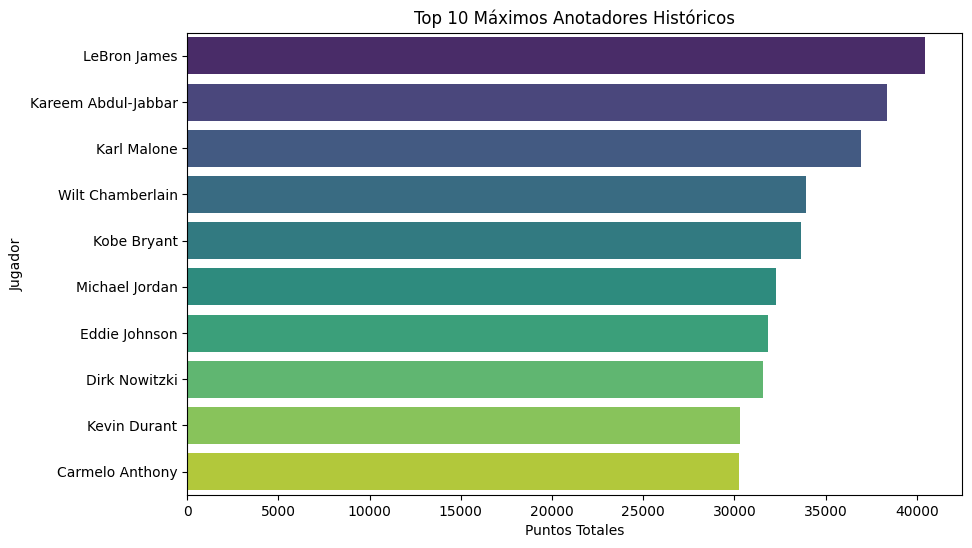

In [12]:
# Top jugadores por puntos totales
top_scorers = df.groupby("Name")["PTS"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_scorers.values, y=top_scorers.index, palette="viridis")
plt.title("Top 10 Máximos Anotadores Históricos")
plt.xlabel("Puntos Totales")
plt.ylabel("Jugador")
plt.show()


## LeBron James

Encabeza la lista, superando los 40.000 puntos.

Es el líder histórico en anotación gracias a su longevidad y consistencia.

## Kareem Abdul-Jabbar & Karl Malone

Durante décadas fueron la cima de la tabla.

Malone destacó por su durabilidad; Kareem por su “sky hook” y carrera de 20 años.

## Wilt Chamberlain

Gran dominador de los 60s, con récords inalcanzables (ej. 100 puntos en un partido).

## Kobe Bryant & Michael Jordan

Figuras icónicas, ambos superando los 30.000 puntos.

Jordan lo logró en menos partidos, lo que refleja su eficiencia anotadora.

## Jugadores modernos

Dirk Nowitzki, Kevin Durant, Carmelo Anthony se cuelan en el Top 10 gracias a su regularidad en las últimas dos décadas.

Durant sigue activo, por lo que podría subir posiciones.

## Dispersión de porcentajes de tiro

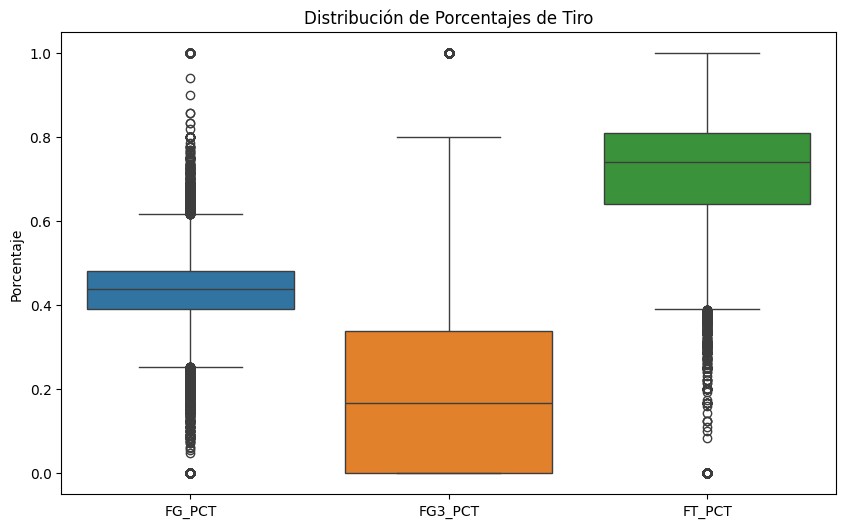

In [13]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[["FG_PCT","FG3_PCT","FT_PCT"]])
plt.title("Distribución de Porcentajes de Tiro")
plt.ylabel("Porcentaje")
plt.show()


## Distribución de Porcentajes de Tiro

FG_PCT (Tiros de campo)

Mediana ≈ 44–45%.

## Distribución relativamente compacta.

Outliers: jugadores con porcentajes muy bajos (≈0%) y algunos con cifras irreales (≈100%, probablemente pocos intentos).

FG3_PCT (Triples)

Mediana ≈ 17%, bastante baja.

Tiene una gran dispersión y muchos ceros → refleja épocas donde no se lanzaban triples o jugadores que no tiraban desde 3.

Algunos casos con eficiencia altísima (outliers >70–80%).

FT_PCT (Tiros libres)

Mediana ≈ 73–75%, con valores bastante estables.

Algunos outliers muy bajos (malos tiradores de libres).

Casos con 100% → jugadores con pocos intentos.

## Conclusión

Tiros de campo y libres → relativamente estables en la liga.

Triples → muestran la mayor variabilidad, lo cual refleja la evolución histórica de su uso (antes casi nulo, hoy esencial).

## Correlaciones entre métricas

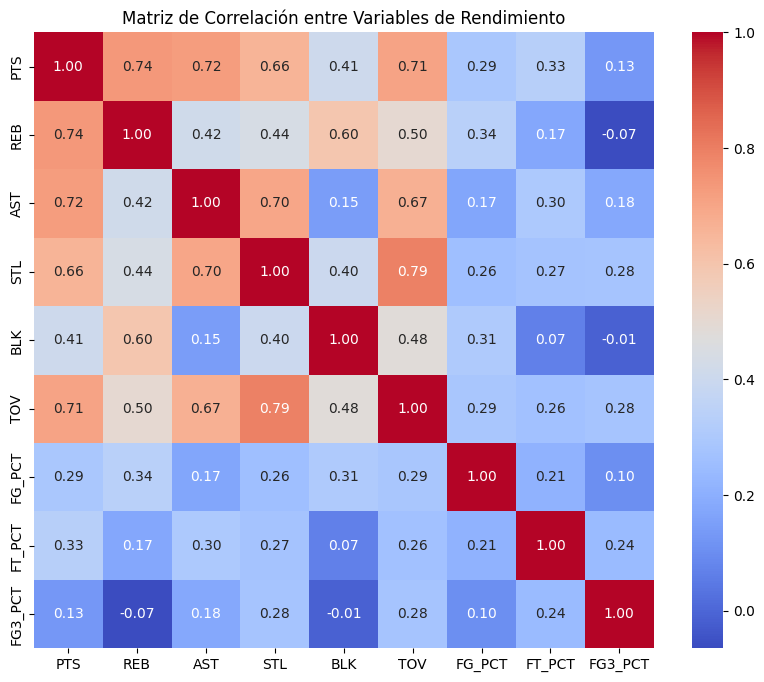

In [14]:
# Seleccionar variables clave para la correlación
corr_vars = ["PTS","REB","AST","STL","BLK","TOV","FG_PCT","FT_PCT","FG3_PCT"]

plt.figure(figsize=(10,8))
sns.heatmap(df[corr_vars].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación entre Variables de Rendimiento")
plt.show()



## Interpretación de la Matriz de Correlación

Correlaciones fuertes con puntos (PTS)

REB (0.74), AST (0.72), TOV (0.71), STL (0.66).

Tiene lógica: jugadores con más protagonismo generan puntos, pero también más asistencias, rebotes y pérdidas.

## Relaciones entre acciones ofensivas y defensivas

AST y STL (0.70) → jugadores con rol de playmaker suelen también robar más balones.

REB y BLK (0.60) → reboteadores suelen ser también bloqueadores.

## Porcentajes de tiro (FG%, 3P%, FT%)

Su correlación con puntos es baja (≤ 0.33).

Indica que acumular puntos depende más del volumen de tiro que de la eficiencia.

## Relación robos (STL) y pérdidas (TOV) → 0.79

Muy interesante: jugadores que arriesgan más para robar también pierden más balones.

FG3_PCT con otras variables

Casi no se relaciona con puntos o rebotes.

Confirma que el triple fue históricamente marginal en muchas temporadas y depende del rol del jugador.

## Conclusión
El volumen de juego (rebotes, asistencias, posesiones) tiene una correlación más alta con puntos que la eficiencia de tiro. Esto refleja que en la NBA histórica el protagonismo en cancha pesa más que la precisión al lanzar.

# Cierre del proceso de limpieza

En este notebook se realizó la limpieza y normalización del dataset **NBA_PLAYER_DATASET**:

- Carga desde la carpeta `data_raw/`.
- Exploración inicial: nulos, duplicados y tipos de datos.
- Imputación de valores faltantes y conversión de tipos numéricos.
- Normalización de nombres de jugadores.
- Análisis descriptivo y visualizaciones de variables clave.
- Generación del dataset final limpio y listo para análisis.

El archivo final se guardó en la carpeta `data_clean/` con el nombre: NBA_PLAYER_DATASET_ready.csv



In [15]:
# Guardar dataset final limpio en data_clean
df.to_csv("../data_clean/NBA_PLAYER_DATASET_ready.csv", index=False)

print("Dataset final guardado en ../data_clean/NBA_PLAYER_DATASET_ready.csv")

# Verificar primeras filas
print("\nPrimeras filas del dataset limpio:")
print(df.head())


Dataset final guardado en ../data_clean/NBA_PLAYER_DATASET_ready.csv

Primeras filas del dataset limpio:
   PLAYER_ID            Name SEASON_ID     TEAM_ID TEAM_ABBREVIATION  \
0      76001  Alaa Abdelnaby   1990-91  1610612757               POR   
1      76001  Alaa Abdelnaby   1991-92  1610612757               POR   
2      76001  Alaa Abdelnaby   1992-93  1610612749               MIL   
3      76001  Alaa Abdelnaby   1992-93  1610612738               BOS   
4      76001  Alaa Abdelnaby   1992-93           0               TOT   

   PLAYER_AGE  GP  GS   MIN  FGM  ...  DREB  REB  AST  STL  BLK  TOV   PF  \
0          23  43   0   290   55  ...    62   89   12    4   12   22   39   
1          24  71   1   934  178  ...   179  260   30   25   16   66  132   
2          25  12   0   159   26  ...    25   37   10    6    4   13   24   
3          25  63  52  1152  219  ...   186  300   17   19   22   84  165   
4          25  75  52  1311  245  ...   211  337   27   25   26   97  189   
